## Introduction

We will be looking at an Pima Indians onset of diabetes dataset and performing Multi-Classification with an Forwardfeed Artifical Neural Network.

Let's remember the ML Process:

1. Load in the data (X, Y)
2. Instantiate the model
3. Train ("fit") the model
4. Evaluate our model

Let's begin.

In [ ]:
#Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


## Part 1: Load in the data (X, Y)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_ann.csv to diabetes_ann.csv


In [ ]:
df = pd.read_csv("diabetes_ann.csv", header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split the dataset into inputs and outputs
X = df.loc[:,0:7]
Y = df.loc[:,8]

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

##Part 2: Build the Model



In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##Part 3: Train the Model


In [ ]:
# Train the model
r = model.fit(X, Y, epochs=15, batch_size=10)

Epoch 1/15
77/77 [==============================] - 0s 905us/step - loss: 0.5734 - accuracy: 0.6901
Epoch 2/15
77/77 [==============================] - 0s 911us/step - loss: 0.5744 - accuracy: 0.6862
Epoch 3/15
77/77 [==============================] - 0s 868us/step - loss: 0.5719 - accuracy: 0.6823
Epoch 4/15
77/77 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6823
Epoch 5/15
77/77 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.6784
Epoch 6/15
77/77 [==============================] - 0s 958us/step - loss: 0.5750 - accuracy: 0.6862
Epoch 7/15
77/77 [==============================] - 0s 1ms/step - loss: 0.5706 - accuracy: 0.6927
Epoch 8/15
77/77 [==============================] - 0s 905us/step - loss: 0.5714 - accuracy: 0.6849
Epoch 9/15
77/77 [==============================] - 0s 938us/step - loss: 0.5721 - accuracy: 0.6797
Epoch 10/15
77/77 [==============================] - 0s 942us/step - loss: 0.5793 - accuracy: 0.6901
Epoch

##Part 4: Evaluate the Model

In [ ]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 854us/step - loss: 0.5811 - accuracy: 0.6732
Accuracy: 67.32


In [ ]:
r.history

{'accuracy': [0.6901041865348816,
  0.6861979365348816,
  0.6822916865348816,
  0.6822916865348816,
  0.6783854365348816,
  0.6861979365348816,
  0.6927083134651184,
  0.6848958134651184,
  0.6796875,
  0.6901041865348816,
  0.6927083134651184,
  0.6861979365348816,
  0.6848958134651184,
  0.68359375,
  0.6861979365348816],
 'loss': [0.5733882784843445,
  0.5743834376335144,
  0.5719451308250427,
  0.5722078680992126,
  0.5749468803405762,
  0.5750418901443481,
  0.5706287026405334,
  0.5714295506477356,
  0.5721381306648254,
  0.5793245434761047,
  0.5741382241249084,
  0.5785832405090332,
  0.5667453408241272,
  0.5719855427742004,
  0.5808302760124207]}

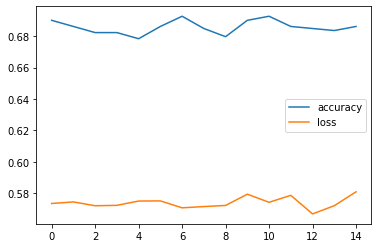

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['loss'], label='loss')
plt.legend()

## Part 5: Making Predictions

In [ ]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print("Evaluate output:", model.evaluate(X, Y))

24/24 [==============================] - 0s 858us/step - loss: 0.5811 - accuracy: 0.6732
Evaluate output: [0.581142008304596, 0.6731770634651184]


##Part 6: Save the Model


In [ ]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [ ]:
!ls -lh 

total 136K
-rw-r--r-- 1 root root  24K Sep 22 02:53 diabetes_ann.csv
-rw-r--r-- 1 root root  16K Sep 22 02:12 ecoli2.csv
-rw-r--r-- 1 root root  16K Sep 22 02:13 ecoli_.csv
-rw-r--r-- 1 root root  20K May 10 19:16 ecoli.csv
-rw-r--r-- 1 root root  20K Sep 22 01:52 ecoli.data
-rw-r--r-- 1 root root  34K Sep 22 03:30 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data


In [ ]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X, Y)

[<keras.layers.core.Dense object at 0x7f5250cd4ed0>, <keras.layers.core.Dense object at 0x7f5250cffd50>, <keras.layers.core.Dense object at 0x7f5250cd4e90>]
24/24 [==============================] - 0s 776us/step - loss: 0.5811 - accuracy: 0.6732


[0.581142008304596, 0.6731770634651184]